# 05_Module

## Decision tree 

This data is from UC Irvine Machine Learning repository

** 1. Read and explore the dataset **

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
eD = pd.read_csv('energyData.csv')

In [29]:
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


{'boxes': [<matplotlib.lines.Line2D at 0x617ec70d0>],
 'caps': [<matplotlib.lines.Line2D at 0x617ecaa50>,
 'fliers': [<matplotlib.lines.Line2D at 0x617ece1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x617ece3d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x617ec7550>,
  <matplotlib.lines.Line2D at 0x617eca350>]}

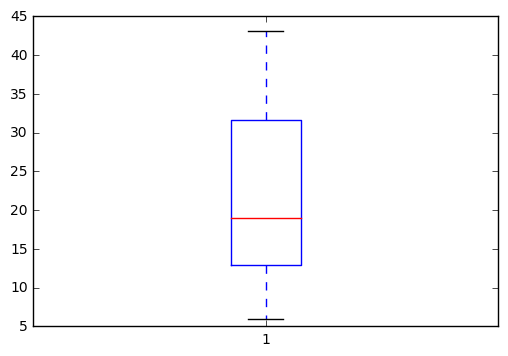

In [30]:
plt.boxplot(eD['Y1'])

** 2. Separate the dataset **

In [33]:
#google: np where two conditions

Y2 = np.where(eD['Y1'] > 30, 'high', (np.where(eD['Y1'] < 10, 'low', 'medium')))

In [36]:
#Y2

In [37]:
set(Y2)

{'high', 'low', 'medium'}

In [38]:
X = eD.iloc[:, 0:8]

** 3. Split the dataset & 4. Assign and learn the model**

In [39]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size = 0.20)

In [40]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()

In [ ]:
tree.<TAB>

In [42]:
tree.DecisionTreeClassifier?

In [41]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
predictions = DT_model.predict(X_test)

** 5. Evaluation **

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
accuracy_score(y_test, predictions)

1.0

In [50]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 40   0   0]
 [  0   1   0]
 [  0   0 113]]


In [51]:
report = classification_report(y_test,predictions)
print(report)

             precision    recall  f1-score   support

       high       1.00      1.00      1.00        40
        low       1.00      1.00      1.00         1
     medium       1.00      1.00      1.00       113

avg / total       1.00      1.00      1.00       154



In [47]:
from sklearn.model_selection import cross_validate

scores_cv = cross_validate(DT_model, X_train, y_train, scoring='precision_macro', cv=5, return_train_score=False)

In [49]:
scores_cv

{'fit_time': array([0.00162792, 0.001261  , 0.00117612, 0.00119495, 0.001194  ]),
 'score_time': array([0.00069189, 0.00058699, 0.00058103, 0.00058413, 0.00058293]),
 'test_score': array([0.99019608, 0.98989899, 1.        , 0.99621212, 1.        ])}

** 6. Additional visualization **

In [ ]:
tree.<TAB>

In [52]:
DT_model.tree_

In [53]:
import pydotplus
from IPython.display import Image 

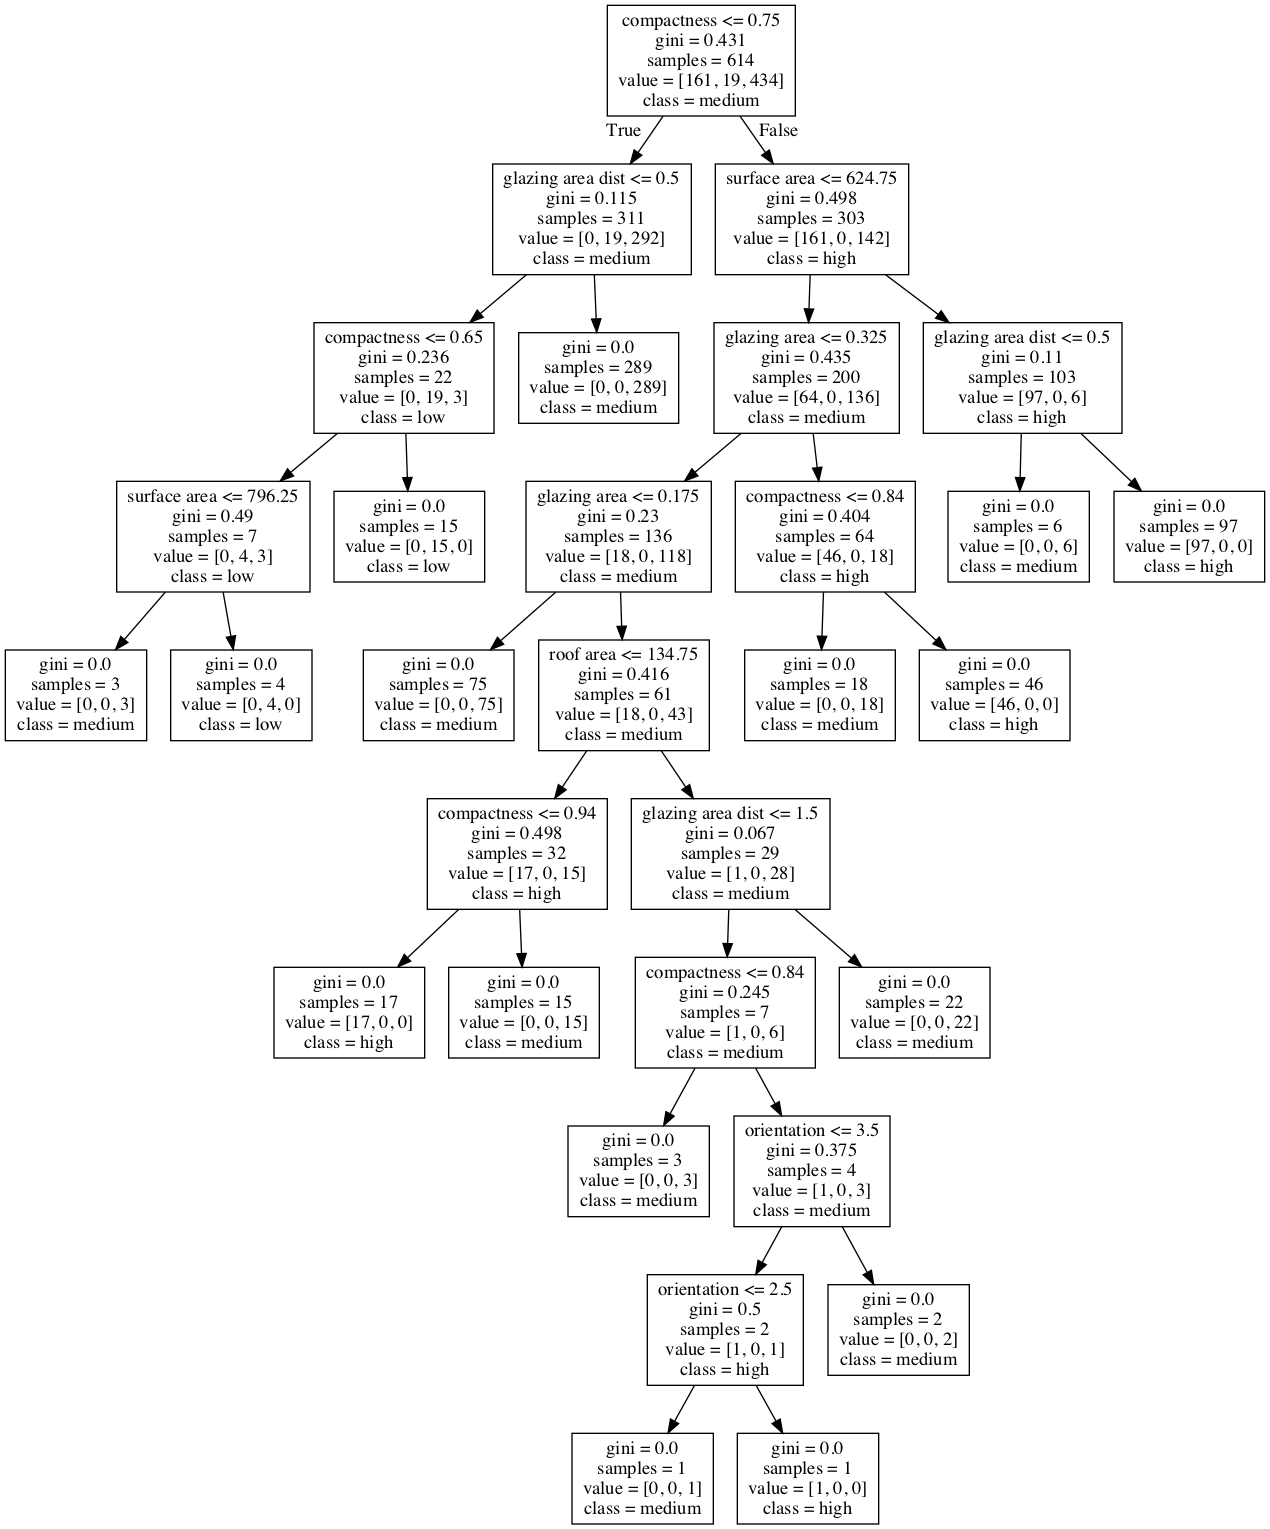

In [54]:
# Create DOT data
dot_data = tree.export_graphviz(DT_model, out_file=None, 
                                feature_names=['compactness','surface area','wall area',
                                               'roof area','height','orientation','glazing area',
                                               'glazing area dist'],  
                                class_names=['high', 'low', 'medium'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Naive Bayes classifier

** 1. Read the data **

In [94]:
IC = pd.read_csv('income.csv')

In [95]:
IC.head()

,work,education,race,sex,native,income
0,Federal-gov,Bachelors,Asian-Pac-Islander,Male,Cambodia,<=50K
1,Federal-gov,11th,White,Female,Canada,<=50K
2,Federal-gov,Prof-school,Asian-Pac-Islander,Female,Canada,>50K
3,Federal-gov,Doctorate,Asian-Pac-Islander,Male,China,>50K
4,Federal-gov,Prof-school,White,Male,Columbia,<=50K


In [96]:
set(IC['income'])

{' <=50K', ' >50K'}

** 2. separate the data **

In [97]:
X = IC.iloc[:, 0:5]

In [98]:
X.head()

,work,education,race,sex,native
0,Federal-gov,Bachelors,Asian-Pac-Islander,Male,Cambodia
1,Federal-gov,11th,White,Female,Canada
2,Federal-gov,Prof-school,Asian-Pac-Islander,Female,Canada
3,Federal-gov,Doctorate,Asian-Pac-Islander,Male,China
4,Federal-gov,Prof-school,White,Male,Columbia


In [99]:
X = pd.get_dummies(X)

In [100]:
X.head()

,work_ Federal-gov,work_ Local-gov,work_ Never-worked,work_ Private,work_ Self-emp-inc,work_ Self-emp-not-inc,work_ State-gov,work_ Without-pay,education_ 10th,education_ 11th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
Y = IC['income']

In [102]:
Y.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: income, dtype: object

** 3. Split the data **

In [103]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

** 4. Assign and learn the model **

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [106]:
predictions = GNB.predict(X_test)

** 5. Evaluation **

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [108]:
accuracy_score(y_test, predictions)

0.37189260855154127

In [109]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 835 3728]
 [  62 1409]]


In [110]:
report = classification_report(y_test,predictions)
print(report)

             precision    recall  f1-score   support

      <=50K       0.93      0.18      0.31      4563
       >50K       0.27      0.96      0.43      1471

avg / total       0.77      0.37      0.34      6034



In [111]:
from sklearn.model_selection import cross_validate

scores_cv = cross_validate(GNB, X_train, y_train, scoring='precision_macro', cv=5, return_train_score=False)

In [112]:
scores_cv

{'fit_time': array([0.04945707, 0.03782892, 0.04099011, 0.04753494, 0.04537821]),
 'score_time': array([0.0222168 , 0.01664805, 0.01661301, 0.01950598, 0.01773095]),
 'test_score': array([0.59788732, 0.60866959, 0.58002111, 0.59436499, 0.60100785])}

## Hierarchical clustering

This example is modified from https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [1]:
import pandas as pd

In [2]:
eD = pd.read_csv('energyData.csv') 

In [3]:
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
X = eD.iloc[:, 0:8]
X_20 = eD.iloc[:20, 0:8]

Y = eD.iloc[:, 8:10]

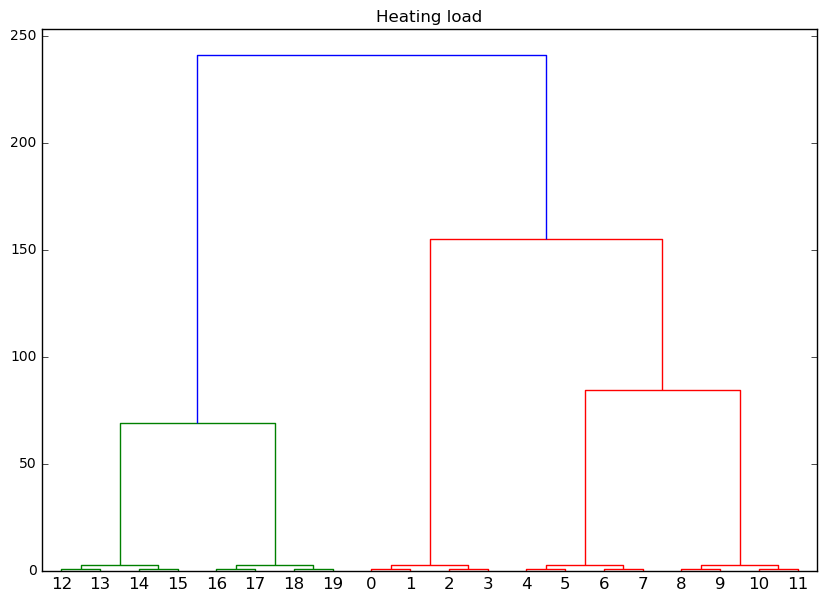

In [10]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Heating load")  
dend = shc.dendrogram(shc.linkage(X_20, method='ward'))  

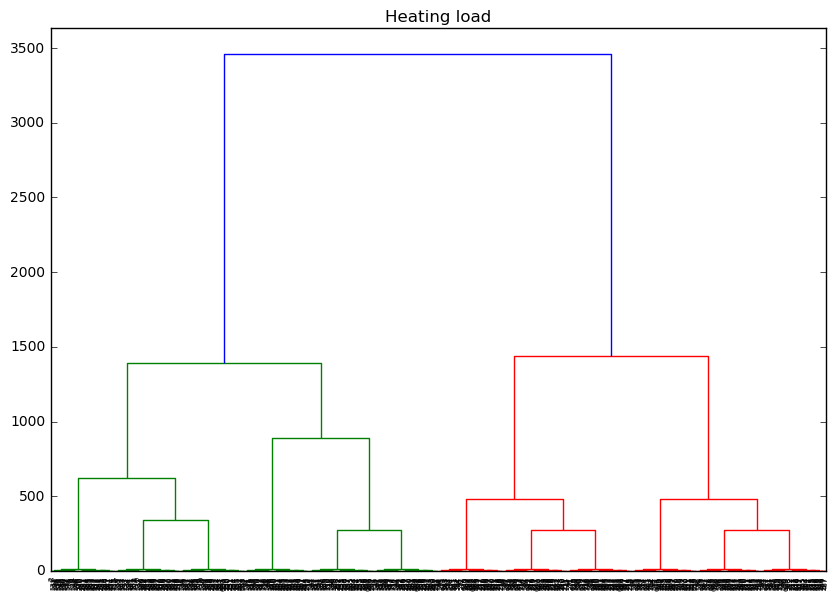

In [11]:
plt.figure(figsize=(10, 7))  
plt.title("Heating load")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  

In the script above we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [3]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
DBSCAN?

In [8]:


cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

## K-means clustering

In [9]:
# evaluation metric

In [1]:
# Google: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score, silhouette_score

In [2]:
KMeans?

In [15]:
sse = {}
CH = {}
SS = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    Y["C"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    CH[k] = calinski_harabaz_score(X, kmeans.labels_)
    SS[k] = silhouette_score(X, kmeans.labels_)

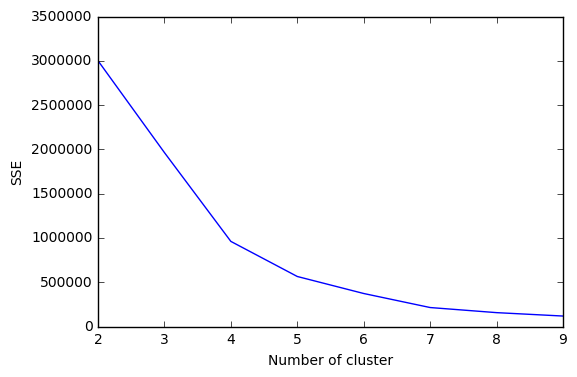

In [16]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

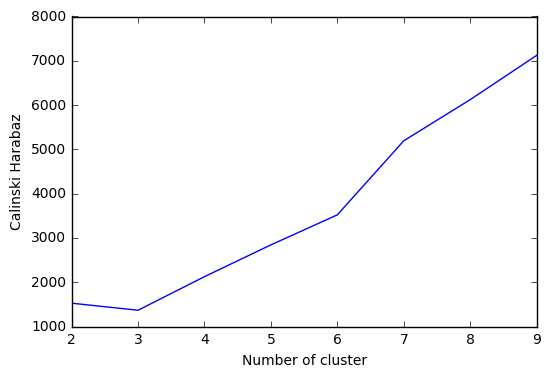

In [17]:
plt.figure()
plt.plot(list(CH.keys()), list(CH.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Calinski Harabaz")
plt.show()

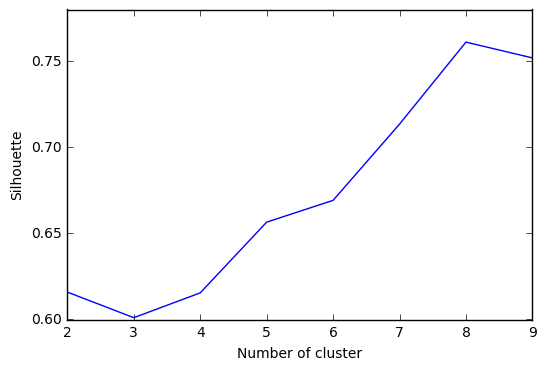

In [18]:
plt.figure()
plt.plot(list(SS.keys()), list(SS.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

In [19]:
# Choosing k=4

In [20]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(X)
Y["C"] = kmeans.labels_

In [21]:
set(Y["C"])

{0, 1, 2, 3}

In [23]:
Y["C"].head()

0    0
1    0
2    0
3    0
4    0
Name: C, dtype: int32

In [24]:
import collections

collections.Counter(Y["C"])

Counter({0: 256, 1: 192, 2: 192, 3: 128})

In [26]:
kmeans.<TAB>

2

In [27]:
kmeans.cluster_centers_

array([[8.90000000e-01, 5.69625000e+02, 3.06250000e+02, 1.31687500e+02,
        7.00000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00],
       [7.13333333e-01, 7.10500000e+02, 2.69500000e+02, 2.20500000e+02,
        3.50000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00],
       [6.40000000e-01, 7.84000000e+02, 3.43000000e+02, 2.20500000e+02,
        3.50000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00],
       [7.75000000e-01, 6.49250000e+02, 3.79750000e+02, 1.34750000e+02,
        7.00000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00]])

# Lessons learned today

### 1. (Again) Using scikit learn is pretty simple (once you practice the basic procedure)

### 2. Only difference for unsupervised learning algorithm is you do not have labels to learn your model

### 3. Choose right metric for evaluating your unsupervised learning algorithms